# Exercícios Aula 9

Selecione duas imagens coloridas e nomeie como: “img_aluno1” e “img_aluno2”.

Considere a escolha de img_aluno1 com imagem de paisagem/vegetal Considere a escolha de img_aluno2 com imagem que contenha pessoa(s)

## Exercício 1

Para cada imagem, crie uma pasta. Nesta pasta voce irá salvar todas as transformações realizadas a partir das imagens originais, sendo:

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def plot(img_1, img_2):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    plt.show()

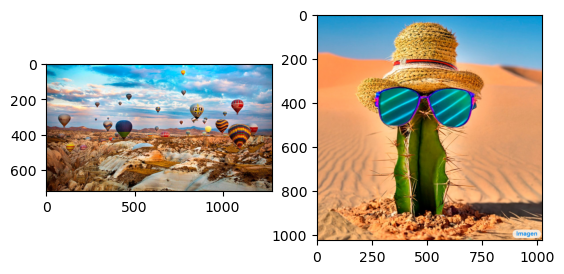

In [32]:
image_1 = cv2.imread('imagem_1\imagem_1.jpg')
image_2 = cv2.imread('imagem_2\imagem_2.jpg')

image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
plot(image_1, image_2)

### a) Realize a translação de 2 pontos em X e 2 pontos em Y


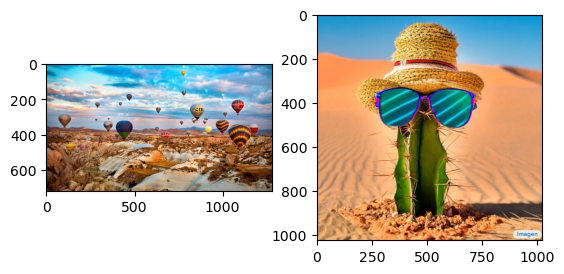

In [33]:
shift = np.float32([[1, 0, 2], [0, 1, 2]])

image_1_translated_positive = cv2.warpAffine(image_1, shift, (image_1.shape[1], image_1.shape[0]))
image_2_translated_positive = cv2.warpAffine(image_2, shift, (image_2.shape[1], image_2.shape[0]))

plot(image_1_translated_positive, image_2_translated_positive)

### b) Realize a translação de -2 pontos em X e -2 pontos em Y

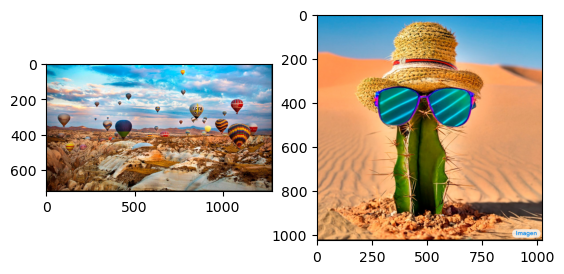

In [34]:
shift = np.float32([[1, 0, -2], [0, 1, -2]])

image_1_translated_negative = cv2.warpAffine(image_1, shift, (image_1.shape[1], image_1.shape[0]))
image_2_translated_negative = cv2.warpAffine(image_2, shift, (image_2.shape[1], image_2.shape[0]))

plot(image_1_translated_negative, image_2_translated_negative)

### c) Realize a rotação de 25 graus sentido horário

In [35]:
def rotate(img, angle):
    if angle < 0:
        angle = 360 - angle
    center = (img.shape[0] / 2, img.shape[1] / 2)
    rotation = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, rotation, (img.shape[0], img.shape[1]))

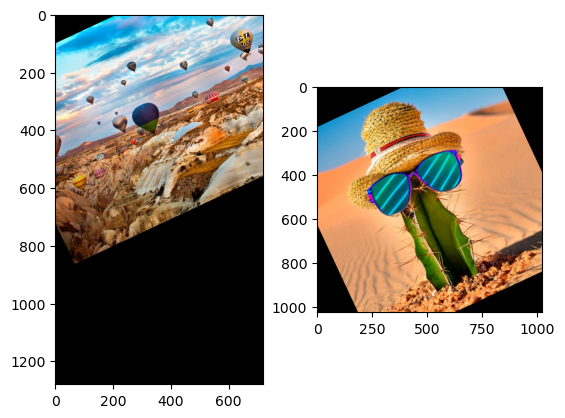

In [36]:
plot(rotate(image_1, 25), rotate(image_2, 25))

### d)  Realize a rotação de 25 graus sentido anti-horário

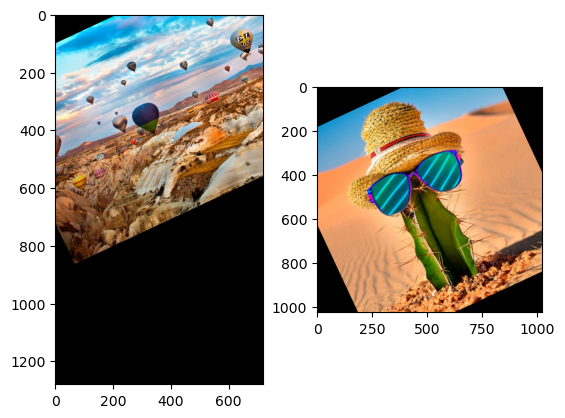

In [37]:
plot(rotate(image_1, -25), rotate(image_2, -25))

### e) Faça uma escala de 50% para diminuir a imagem em X e Y, sem aspect ratio (ou seja, não fazer interpolação)

In [38]:
def transform_scale(img, scale):
    new_width = int(img.shape[0] * scale / 100)
    new_height = int(img.shape[1] * scale / 100)
    new_dimension = (new_height, new_width)

    return cv2.resize(img, new_dimension, interpolation = cv2.INTER_NEAREST)

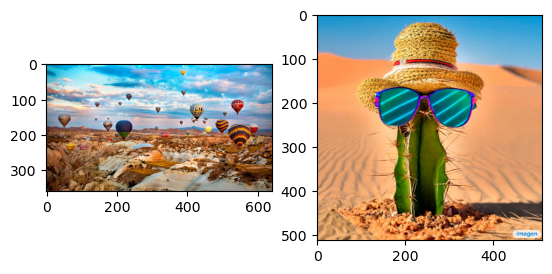

In [39]:
image_1_minus_50 = transform_scale(image_1, 50)
image_2_minus_50 = transform_scale(image_2, 50)

plot(image_1_minus_50, image_2_minus_50)

In [40]:
print(f'Escala anterior da imagem 1: {image_1.shape}')
print(f'Nova escala: {image_1_minus_50.shape}')
print(f'A relação de das escalas é: {image_1_minus_50.shape[0] / image_1.shape[0], image_1_minus_50.shape[1] / image_1.shape[1]}')

Escala anterior da imagem 1: (720, 1280, 3)
Nova escala: (360, 640, 3)
A relação de das escalas é: (0.5, 0.5)


In [41]:
print(f'Escala anterior da imagem 2: {image_2.shape}')
print(f'Nova escala: {image_2_minus_50.shape}')
print(f'A relação de das escalas é: {image_2_minus_50.shape[0] / image_2.shape[0], image_2_minus_50.shape[1] / image_2.shape[1]}')

Escala anterior da imagem 2: (1024, 1024, 3)
Nova escala: (512, 512, 3)
A relação de das escalas é: (0.5, 0.5)


### f) Faça uma escala de 50% para aumentar a imagem em X e Y, com aspectio ratio (ou seja, fazer interpolação de AREA)

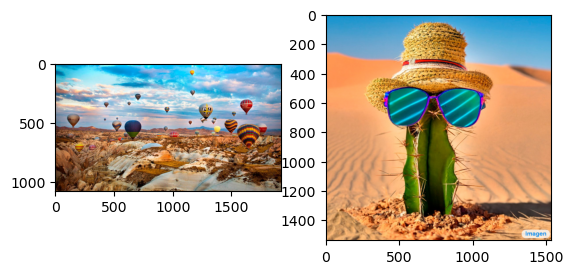

In [42]:
image_1_plus_50 = transform_scale(image_1, 150)
image_2_plus_50 = transform_scale(image_2, 150)

plot(image_1_plus_50, image_2_plus_50)

In [43]:
print(f'Escala anterior da imagem 1: {image_1.shape}')
print(f'Nova escala: {image_1_plus_50.shape}')
print(f'A relação de das escalas é: {image_1_plus_50.shape[0] / image_1.shape[0], image_1_plus_50.shape[1] / image_1.shape[1]}')

Escala anterior da imagem 1: (720, 1280, 3)
Nova escala: (1080, 1920, 3)
A relação de das escalas é: (1.5, 1.5)


In [44]:
print(f'Escala anterior da imagem 2: {image_2.shape}')
print(f'Nova escala: {image_2_plus_50.shape}')
print(f'A relação de das escalas é: {image_2_plus_50.shape[0] / image_2.shape[0], image_2_plus_50.shape[2] / image_2.shape[2]}')

Escala anterior da imagem 2: (1024, 1024, 3)
Nova escala: (1536, 1536, 3)
A relação de das escalas é: (1.5, 1.0)


### g) Faça uma escala para aumentar a largura da imagem em 25 pontos. (mantenha a altura)

In [45]:
def change_dimensions(img, width_incrementation = 0, height_incrementation = 0):
    new_width = int(img.shape[0] + width_incrementation)
    new_height = int(img.shape[1] + height_incrementation)
    new_dimension = (new_height, new_width)

    return cv2.resize(img, new_dimension, interpolation = cv2.INTER_NEAREST)

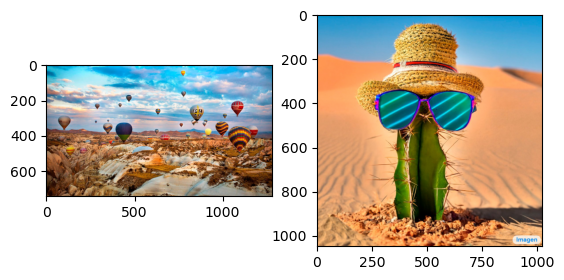

In [46]:
image_1_plus_25_p = change_dimensions(image_1, width_incrementation=25)
image_2_plus_25_p = change_dimensions(image_2, width_incrementation=25)

plot(image_1_plus_25_p, image_2_plus_25_p)

In [47]:
print(f'Escala anterior da imagem 1: {image_1.shape}')
print(f'Nova escala: {image_1_plus_25_p.shape}')
print(f'A relação de das escalas é: {image_1_plus_25_p.shape[0] - image_1.shape[0], image_1_plus_25_p.shape[1] - image_1.shape[1]}')

Escala anterior da imagem 1: (720, 1280, 3)
Nova escala: (745, 1280, 3)
A relação de das escalas é: (25, 0)


In [48]:
print(f'Escala anterior da imagem 2: {image_2.shape}')
print(f'Nova escala: {image_2_plus_25_p.shape}')
print(f'A relação de das escalas é: {image_2_plus_25_p.shape[0] - image_2.shape[0], image_2_plus_25_p.shape[2] - image_2.shape[2]}')

Escala anterior da imagem 2: (1024, 1024, 3)
Nova escala: (1049, 1024, 3)
A relação de das escalas é: (25, 0)


### h) Faça uma escala para aumentar a altura da imagem em 25 pontos. (mantenha a largura).

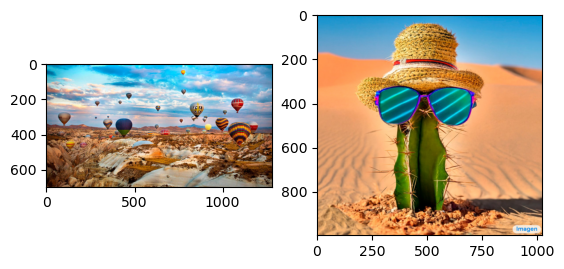

In [49]:
image_1_minus_25_p = change_dimensions(image_1, width_incrementation=-25)
image_2_minus_25_p = change_dimensions(image_2, width_incrementation=-25)

plot(image_1_minus_25_p, image_2_minus_25_p)

In [50]:
print(f'Escala anterior da imagem 1: {image_1.shape}')
print(f'Nova escala: {image_1_minus_25_p.shape}')
print(f'A relação de das escalas é: {image_1_minus_25_p.shape[0] - image_1.shape[0], image_1_minus_25_p.shape[1] - image_1.shape[1]}')

Escala anterior da imagem 1: (720, 1280, 3)
Nova escala: (695, 1280, 3)
A relação de das escalas é: (-25, 0)


In [51]:
print(f'Escala anterior da imagem 2: {image_2.shape}')
print(f'Nova escala: {image_2_minus_25_p.shape}')
print(f'A relação de das escalas é: {image_2_minus_25_p.shape[0] - image_2.shape[0], image_2_minus_25_p.shape[1] - image_2.shape[1]}')

Escala anterior da imagem 2: (1024, 1024, 3)
Nova escala: (999, 1024, 3)
A relação de das escalas é: (-25, 0)
